In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors


# filename = 'data_clustered'
filename = '../data/data_parsed'

with open(f'{filename}.pkl','rb') as f:
    loaded = pickle.load(f)
df_tot = loaded['df']


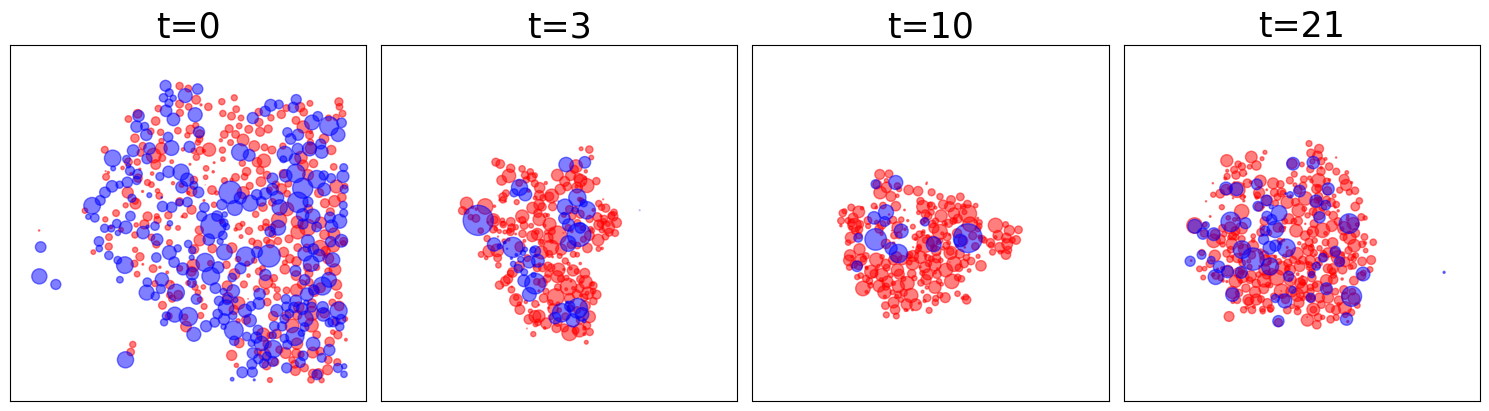

In [2]:
# Filter the dataframe based on the given conditions
df_filtered = df_tot[(df_tot['experiment'] == 'constitutive') & 
                     (df_tot['ratio'] == '1:1') & 
                     (df_tot['n_cells'] == 900) & 
                     (df_tot['rep'] == 4)]

# Create a figure with subplots for different time points
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Define the time points to plot
time_points = [0, 3, 10, 21]

# Plot the data for each time point
for i, t in enumerate(time_points):
    ax = axes[i]
    df_time = df_filtered[df_filtered['t'] == t]
    
    # Plot cell type A in gray
    df_A = df_time[df_time['cell_type'] == 'A']
    ax.scatter(df_A['x'], df_A['y'], s=df_A['v'] / 100, color='red', alpha=0.5)
    
    # Plot cell type B in blue
    df_B = df_time[df_time['cell_type'] == 'B']
    ax.scatter(df_B['x'], df_B['y'], s=df_B['v'] / 100, color='blue', alpha=0.5)
    
    ax.set_title(f't={t}',fontsize=25)
    ax.set_xlim([-350, 350])
    ax.set_ylim([-350, 350])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

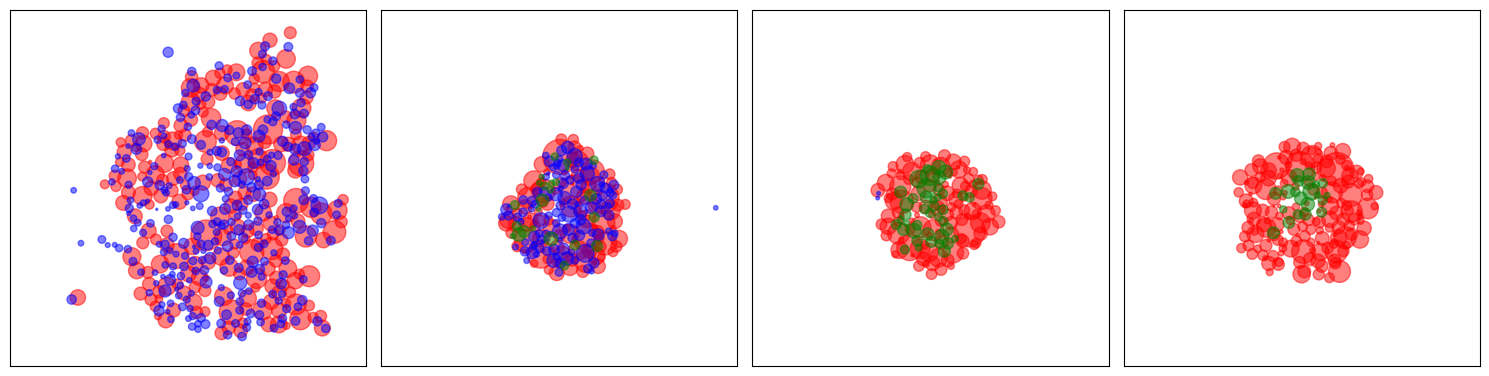

In [3]:
# Filter the dataframe based on the given conditions
df_filtered = df_tot[(df_tot['experiment'] == 'induced') & 
                     (df_tot['ratio'] == '1:1') & 
                     (df_tot['n_cells'] == 900) & 
                     (df_tot['rep'] == 2)]

# Create a figure with subplots for different time points
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Define the time points to plot
time_points = [0, 3, 10, 21]

# Plot the data for each time point
for i, t in enumerate(time_points):
    ax = axes[i]
    df_time = df_filtered[df_filtered['t'] == t]
    
    # Plot cell type A in red
    df_A = df_time[df_time['cell_type'] == 'A']
    ax.scatter(df_A['x'], df_A['y'], s=df_A['v'] / 100, color='red', alpha=0.5)
    
    # Plot cell type B with GFP < 1000 in blue
    df_B_low_GFP = df_time[(df_time['cell_type'] == 'B') & (df_time['GFP'] < 1000)]
    ax.scatter(df_B_low_GFP['x'], df_B_low_GFP['y'], s=df_B_low_GFP['v'] / 100, color='blue', alpha=0.5)
    
    # Plot cell type B with GFP >= 1000 in green
    df_B_high_GFP = df_time[(df_time['cell_type'] == 'B') & (df_time['GFP'] >= 1000)]
    ax.scatter(df_B_high_GFP['x'], df_B_high_GFP['y'], s=df_B_high_GFP['v'] / 100, color='green', alpha=0.5)
    
    # ax.set_title(f't={t}')
    ax.set_xlim([-350, 350])
    ax.set_ylim([-350, 350])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()